In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font = {"size"   : 20}
plt.rc("font", **font)
plt.rcParams['ytick.right']

df = pd.read_csv("slabs_ratio.data", skiprows = 1, 
                 header = None, 
                 delimiter=" ", 
                 names=range(34))


In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1,36,36,23,5,35,0,36,0,36,...,0,36,0,36,1,32,9,21,36,36
1,1,36,36,36,0,36,0,36,0,36,...,0,36,0,36,0,36,0,36,36,36
2,1,36,36,22,6,35,0,36,0,36,...,0,36,0,36,2,29,12,20,36,36
3,1,36,36,36,0,36,0,36,0,36,...,0,36,0,36,0,36,0,36,36,36


In [4]:
df = df.drop(df.columns[0], axis=1)
tdf = df.transpose()
tdf

,0,1,2,3
1,36,36,36,36
2,36,36,36,36
3,23,36,22,36
4,5,0,6,0
5,35,36,35,36
6,0,0,0,0
7,36,36,36,36
8,0,0,0,0
9,36,36,36,36
10,0,0,0,0


In [5]:
tdf

,0,1,2,3
1,36,36,36,36
2,36,36,36,36
3,23,36,22,36
4,5,0,6,0
5,35,36,35,36
6,0,0,0,0
7,36,36,36,36
8,0,0,0,0
9,36,36,36,36
10,0,0,0,0


In [6]:
#df = df.drop(df.columns[0], axis=1)
tdf = df.transpose()
tdf["layer"] = tdf.index
tdf.columns = ["half-tet", "full-tet", 
               "half-int", "full-int",
               "layer"]

col1 = tdf.pop("layer")
tdf.insert(0, "layer", col1)

In [7]:
tdf

,layer,half-tet,full-tet,half-int,full-int
1,1,36,36,36,36
2,2,36,36,36,36
3,3,23,36,22,36
4,4,5,0,6,0
5,5,35,36,35,36
6,6,0,0,0,0
7,7,36,36,36,36
8,8,0,0,0,0
9,9,36,36,36,36
10,10,0,0,0,0


In [8]:
structures = list(tdf.columns[1::])
structures

['half-tet', 'full-tet', 'half-int', 'full-int']

In [9]:
structures =list(tdf.columns[2::2])+list(tdf.columns[1::2])
structures

['full-tet', 'full-int', 'half-tet', 'half-int']

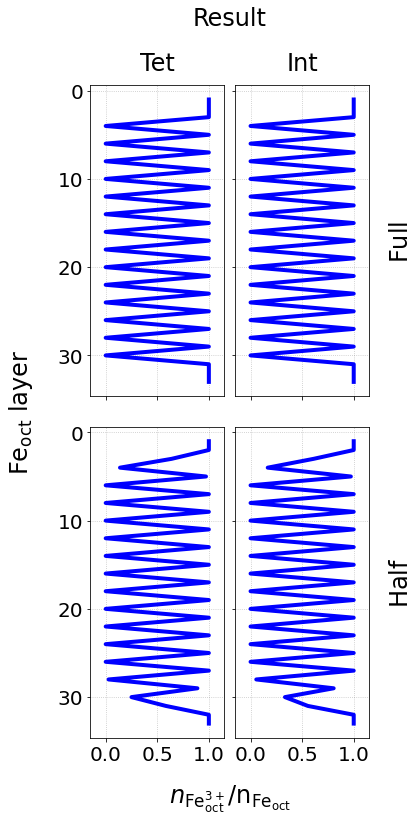

In [10]:
structures =list(tdf.columns[2::2])+list(tdf.columns[1::2])

row = 0
col = 0

fig, axis = plt.subplots(2, 2, figsize=(5, 12), facecolor="w", 
                         sharex=True, sharey=True)

fig.subplots_adjust(hspace=0.1, wspace=0.08)

axis[0, 1].set_yticks([0, 10, 20, 30])
axis[0, 0].set_xticks([0, 0.5, 1.0])

axis[0, 0].invert_yaxis()
#axis[0, 0].invert_xaxis()

axis[0, 0].set_xlim([-0.15, 1.15])

axis[0, 1].set_ylabel(r"$\mathrm{Full}$", ha="center", fontsize=24, labelpad=20)
axis[1, 1].set_ylabel(r"$\mathrm{Half}$", ha="center", fontsize=24, labelpad=20)
axis[0, 1].yaxis.set_label_position("right")
axis[1, 1].yaxis.set_label_position("right")

axis[0, 0].set_title("Tet", fontsize=24, pad=15)
axis[0, 1].set_title("Int", fontsize=24, pad=15)


for system in structures:
    axis[col, row].plot(tdf[system]/36, tdf["layer"], linewidth=4, color="blue")
    axis[col, row].yaxis.grid(color='gray', linestyle='dotted', alpha=0.5)
    axis[col, row].xaxis.grid(color='gray', linestyle='dotted', alpha = 0.5)
    #axis[col, row].axhspan(0,12 , facecolor='lightblue', alpha=0.5)
    #axis[col, row].axhspan(12,24 , facecolor='grey', alpha=0.3)
    #axis[col, row].text(-0.1, 21.5, 'fixed\nbulk', color='white', fontsize=22)
    row +=1
    if row == 2:
        row = 0
        col += 1

# Invisible plot for title declaration
ax0 = fig.add_subplot(111, frame_on=False)
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_xlabel(r"$n_{\mathrm{{Fe}_{oct}^{3+}}}/\mathrm{n_{{Fe}_{oct}}}$", labelpad=45, fontsize=24)
ax0.set_ylabel(r"Fe$_\mathrm{oct}$ layer", labelpad=55, fontsize=24)
ax0.set_title("Result", pad=60)
#ax0.set_title("21L + 24L", fontsize=30, pad=55)
plt.show()


In [11]:
fig.savefig('65L_layered_result.pdf',format='pdf', bbox_inches = "tight")
fig.savefig('65L_layered_result.png', dpi=300.0,format='png', bbox_inches = "tight")

In [12]:
pwd

'/home/emre/231214_65L_formate_ordered/2_65_layered_surface'